In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# 1. Obtener los datos

pbi = pd.read_csv("http://bit.do/ep2020inv-pbi", index_col=0)

In [3]:
#pbi.columns, pbi.index, pbi.head(), pbi.tail(), pbi.shape, pbi.columns.min(), pbi.columns.max()
print('Las filas guardan los datos que corresponden a un determinado país, ' +
      'mientras que las columnas guardan los datos para un determinado año.')
print('Hay', pbi.shape[0], 'países registrados.')
print('Los datos corresponden a valores de PBI desde el año', pbi.columns.min(), 'hasta el año' + str(pbi.columns.max()) + '.')

Las filas guardan los datos que corresponden a un determinado país, mientras que las columnas guardan los datos para un determinado año.
Hay 193 países registrados.
Los datos corresponden a valores de PBI desde el año 1800 hasta el año2040.


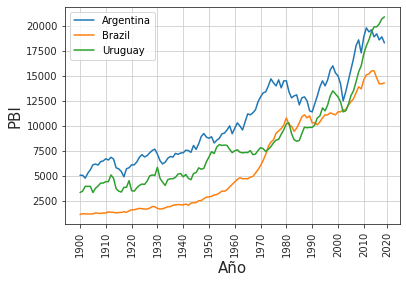

In [4]:
# 2.

f1900t2018 = np.arange(1900, 2018+1, 1, dtype=int).astype(str)
f1900t2018 = pbi[f1900t2018]
with sns.axes_style('ticks', {'axes.grid': True}):
    sns.lineplot(x=f1900t2018.loc['Argentina'].index, y=f1900t2018.loc['Argentina'].values, label='Argentina')
    sns.lineplot(x=f1900t2018.loc['Brazil'].index, y=f1900t2018.loc['Brazil'].values, label='Brazil')
    sns.lineplot(x=f1900t2018.loc['Uruguay'].index, y=f1900t2018.loc['Uruguay'].values, label='Uruguay')
plt.legend(loc='upper left')
plt.xticks(np.arange(1900, 2020+1, 10).astype(str), rotation=90, fontsize=10)
plt.xlabel(xlabel='Año', fontsize=15)
plt.ylabel(ylabel='PBI', fontsize=15)
plt.show()

In [5]:
# 3.

geo = pd.read_csv("http://bit.do/ep2020inv-geo", index_col='name')

#display(geo)
geo.columns, geo.index

(Index(['geo', 'four_regions', 'eight_regions', 'six_regions',
        'members_oecd_g77', 'Latitude', 'Longitude', 'UN member since',
        'World bank region', 'World bank, 4 income groups 2017',
        'World bank, 3 income groups 2017'],
       dtype='object'),
 Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
        ...
        'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Palestine', 'Vietnam',
        'Yemen', 'Zambia', 'Zimbabwe', 'South Sudan'],
       dtype='object', name='name', length=197))

In [7]:
# 4. Combinando datos

def agregar_region(df, regions='four_regions'):
    geo = pd.read_csv("http://bit.do/ep2020inv-geo", index_col='name')
    df['region'] = geo[regions]
    return df

agregar_region(pbi)
print('El DataFrame tiene', pbi['region'].value_counts()['africa'],
      'países de Africa y', pbi['region'].value_counts()['asia'], 'países de Asia')
print('El país sin región asignada es', pbi[pbi['region'].isna()].index[0], '.')

El DataFrame tiene 54 países de Africa y 57 países de Asia
El país sin región asignada es North Macedonia .


In [8]:
# 5.

print('Los 10 países con mayor PBI per cápita en el 2000 fueron:')
print(pbi.sort_values('2000').tail(10).index.values)

Los 10 países con mayor PBI per cápita en el 2000 fueron:
['Monaco' 'Switzerland' 'Singapore' 'Norway' 'Kuwait' 'San Marino'
 'Luxembourg' 'Brunei' 'United Arab Emirates' 'Qatar']


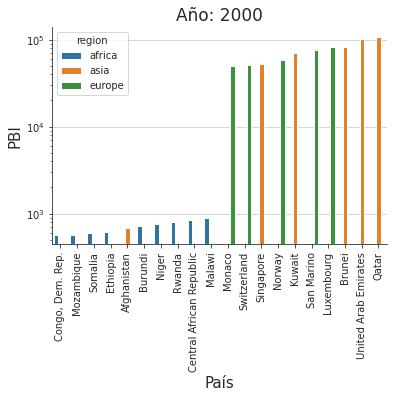

In [9]:
# 6.

year = '2000'
extremos = pbi.sort_values(year).head(10)
extremos = extremos.append(pbi.sort_values(year).tail(10))
with sns.axes_style('ticks', {'axes.grid': True}):
    sns.barplot(data=extremos, x=extremos.index, y=year, hue='region')
    sns.despine()
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel(xlabel='País', fontsize=15)
plt.ylabel(ylabel='PBI', fontsize=15)
plt.title('Año: 2000', fontsize=17)
plt.show()

In [10]:
# 7.

def seleccionar_extremos(df, n, anio):
    anio = str(anio)
    extremos = df.sort_values(anio).head(n)
    extremos = extremos.append(df.sort_values(anio).tail(n))
    return extremos

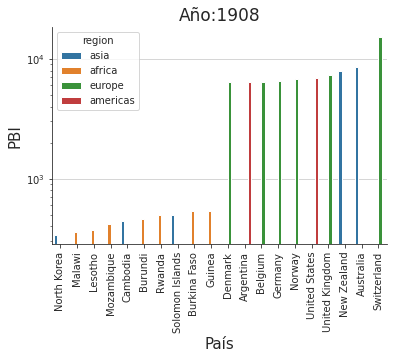

In [11]:
year = 1908
extremos = seleccionar_extremos(pbi, 10, year)
with sns.axes_style('ticks', {'axes.grid': True}):
    sns.barplot(data=extremos, x=extremos.index, y=str(year), hue='region')
    sns.despine()
plt.yscale('log')
plt.xticks(rotation=90)
plt.xlabel(xlabel='País', fontsize=15)
plt.ylabel(ylabel='PBI', fontsize=15)
plt.title(('Año:' + str(year)), fontsize=17)
plt.show()

In [12]:
# 8.

with sns.axes_style('ticks', {'axes.grid': True}):
    sns.distplot(pbi['2000'], kde=False)
    plt.axvline(pbi['2000'].mean(), c='r', label='PBI Promedio')
    sns.despine()
plt.legend()
plt.yscale('log')
plt.xlabel(xlabel='PBI', fontsize=15) 
plt.show()

In [13]:
# 9.

co2 = pd.read_csv("http://bit.do/ep2020inv-co2", index_col=0)

In [14]:
# 10.

pbi_co2 = pd.DataFrame({'pbi': pbi['2000'], 'co2': co2['2000']})

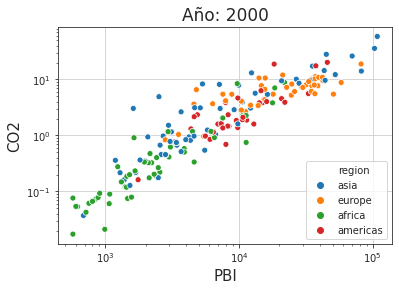

In [15]:
# 11.

with sns.axes_style('ticks', {'axes.grid': True}):
    sns.scatterplot(data=pbi_co2, x='pbi', y='co2', hue=pbi['region'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(xlabel='PBI', fontsize=15)
plt.ylabel(ylabel='CO2', fontsize=15)
plt.title(('Año: 2000'), fontsize=17)
plt.show()

In [16]:
# 12.

lifexpec = pd.read_csv("http://bit.do/ep2020inv-decimales", index_col=0, decimal=",", delimiter=",")

In [17]:
data2010 = pd.DataFrame({'pbi': pbi['2010'], 'co2': co2['2010'], 'lifexpec': lifexpec['2010']})

In [18]:
# 13.

population = pd.read_csv('http://bit.do/ep2020inv-poblacion', index_col=0)

In [19]:
# Optativo 1.

def cuadrados_minimos(X, Y):
    n = len(X)
    x = X.mean()
    y = Y.mean()
    numer = 0
    denom = 0
    for i in range(n):
        # print(i, numer, denom)
        numer += (X.iloc[i] - x) * (Y.iloc[i] - y)
        denom += (X.iloc[i] - x)**2
    m = numer / denom
    b = y - m*x
    return m, b

In [20]:
data2010['population'] = population['2010']
data2010['region'] = pbi['region']
data2010 = data2010.dropna()

In [21]:
plt.figure(figsize=(8, 6), facecolor='white')
x = np.sort(data2010['pbi'].unique())
m, b = cuadrados_minimos(data2010['pbi'], data2010['co2'])
y = [m*xi + b for xi in x]
with sns.axes_style('ticks', {'axes.grid': True}):
    sns.scatterplot(data=data2010, x='pbi', y='co2', hue='region', size='population', sizes=(30, 200))
    plt.plot(x, y, '-k')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel(xlabel='PBI', fontsize=15, c='k')
plt.ylabel(ylabel='CO2', fontsize=15, c='k')
plt.title(('Año: 2010'), fontsize=17, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.savefig('PBI_CO2_2010.pdf')
plt.show()

plt.figure(figsize=(8, 6), facecolor='white')
x = np.sort(data2010['pbi'].unique())
m, b = cuadrados_minimos(data2010['pbi'], data2010['lifexpec'])
y = [m*xi + b for xi in x]
with sns.axes_style('ticks', {'axes.grid': True}):
    sns.scatterplot(data=data2010, x='pbi', y='lifexpec', hue='region', size='population', sizes=(30, 200))
    plt.plot(x, y, '-b')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel(xlabel='PBI', fontsize=15, c='k')
plt.ylabel(ylabel='Esperanza de Vida', fontsize=15, c='k')
plt.title(('Año: 2010'), fontsize=17, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.savefig('PBI_LifeExpectancy_2010.png')
plt.show()

plt.figure(figsize=(8, 6), facecolor='white')
x = np.sort(data2010['co2'].unique())
m, b = cuadrados_minimos(data2010['co2'], data2010['lifexpec'])
y = [m*xi + b for xi in x]
with sns.axes_style('ticks', {'axes.grid': True}):
    sns.scatterplot(data=data2010, x='co2', y='lifexpec', hue='region', size='population', sizes=(30, 200))
    plt.plot(x, y, '-c')
plt.xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel(xlabel='CO2', fontsize=15, c='k')
plt.ylabel(ylabel='Esperanza de Vida', fontsize=15, c='k')
plt.title(('Año: 2010'), fontsize=17, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.savefig('CO2_LifeExpectancy_2010.jpg')
plt.show()

In [22]:
# Optativo 2.

lifexbycontinent = lifexpec.groupby(pbi['region']).mean()
lifexbycontinent = lifexbycontinent.transpose()
filtro1950 = lifexbycontinent.index.astype(int) >= 1950
filtro2015 = lifexbycontinent.index.astype(int) >= 2015
with sns.axes_style('ticks', {'axes.grid': True}):
    sns.lineplot(data=lifexbycontinent[filtro1950 & ~(filtro2015)])
plt.xticks(np.arange(1950, 2020, 10).astype(str))
plt.xlabel(xlabel='Año', fontsize=13)
plt.ylabel(ylabel='Esperanza de Vida', fontsize=13)
plt.title(label='Esperanza de Vida 1950 - 2014', fontsize=17)
plt.show()

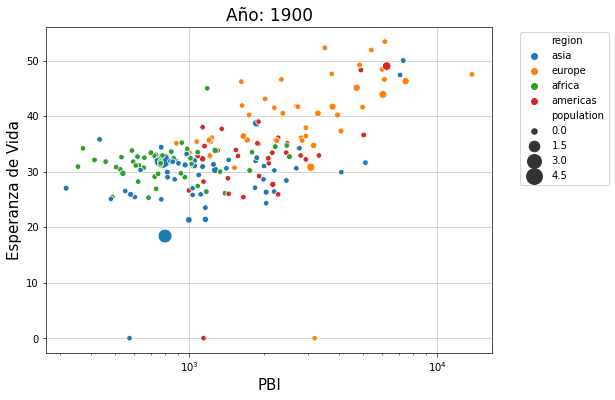

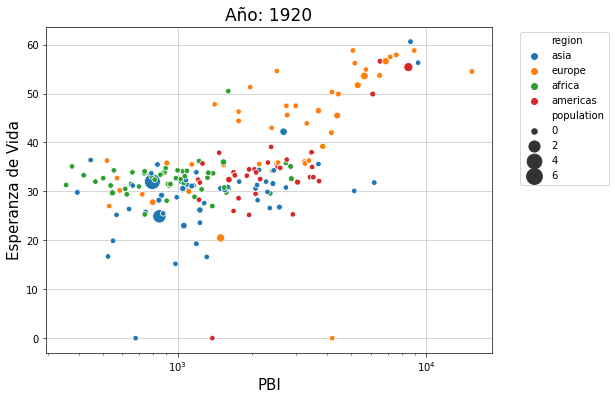

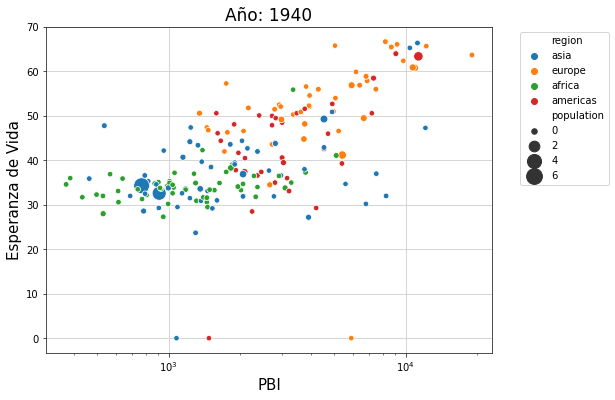

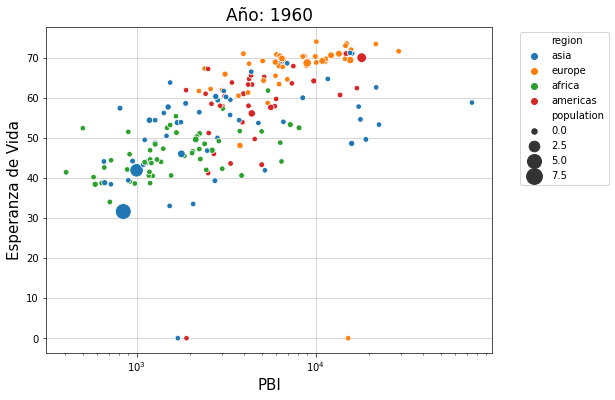

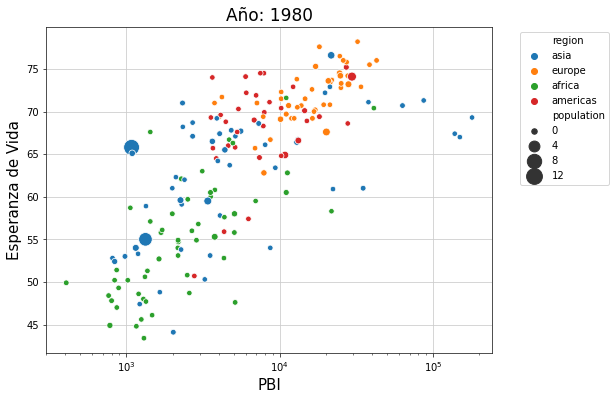

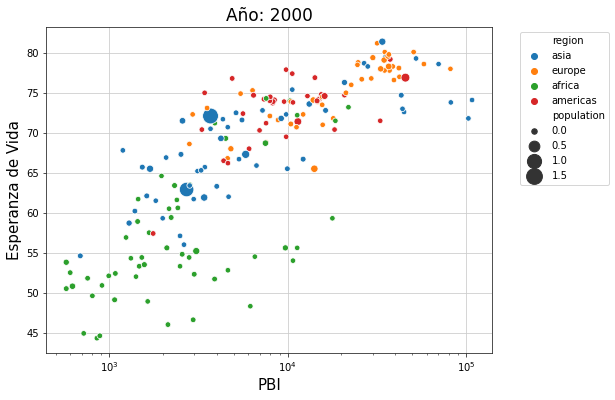

In [25]:
# Optativo 3.

years = np.arange(1900, 2000 + 1, 20).astype(str)
for año in years:
    data_año = pd.DataFrame({'pbi': pbi[año], 'lifexpec': lifexpec[año],
                             'region': geo['four_regions'], 'population': population[año]})
    plt.figure(figsize=(8, 6), facecolor='white')
    with sns.axes_style('ticks', {'axes.grid': True}):
        sns.scatterplot(data=data_año, x='pbi', y='lifexpec', hue='region', size='population', sizes=(30, 250))
    plt.xscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.xlabel(xlabel='PBI', fontsize=15, c='k')
    plt.ylabel(ylabel='Esperanza de Vida', fontsize=15, c='k')
    plt.title(('Año: ' + año), fontsize=17, c='k')
    plt.xticks(c='k')
    plt.yticks(c='k')
    plt.show()